# ELEN90097 Workshop 1 – Modelling and Analysis for AI

- XIUFU SUN 1372750
- ZHIHAN XU

## Question: Solving ODEs using Trajector Example

(0.0, 3.0)

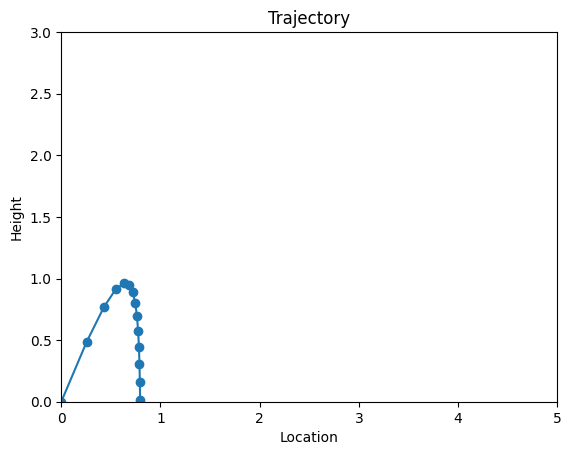

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

m = 1.  # particle's mass
k = 5  # drag coefficient
g = 9.81  # gravity acceleration
# The initial position is (0, 0).
v0 = np.zeros(4)
# The initial speed vector is oriented
# to the top right.
v0[2] = 4.
v0[3] = 8.

# the function to integrate
def f(t, v, k, m, g):
    # v has four components: v=[u, u']. Note u has two components itself, so 2x2=4!
    u, udot = v[:2], v[2:]
    # We compute the second derivative u'' of u in a fancy shortcut way
    udotdot = -k / m * udot   # air drag affects both x and y
    udotdot[1] -= g           
    # gravity only affects y in reverse direction  
    # We return v'=[u', u''].
    return np.r_[udot, udotdot]  # concatenate, https://numpy.org/devdocs/reference/generated/numpy.r_.h

# We want to evaluate the system between t=0 and t=3.
tspan = [0, 3]
t_pts = np.linspace(tspan[0],tspan[1], 40)  # 40 points 

#v = spi.odeint(f, v0, t, args=(k,))
solution = spi.solve_ivp(f, tspan, v0, args=(k, m, g), t_eval=t_pts, dense_output=True, method="RK45")
#solution.y
# We plot the particle's trajectory.
fig, ax = plt.subplots()
ax.plot(solution.y[0,:], solution.y[1,:], 'o-')
ax.set(xlabel='Location', ylabel='Height', title='Trajectory')
ax.set_xlim(0, 5)
ax.set_ylim(0, 3)
# fig.savefig("trajectory.png")  # you can save the figure if you wish


## Question: Solve an ODE with step input

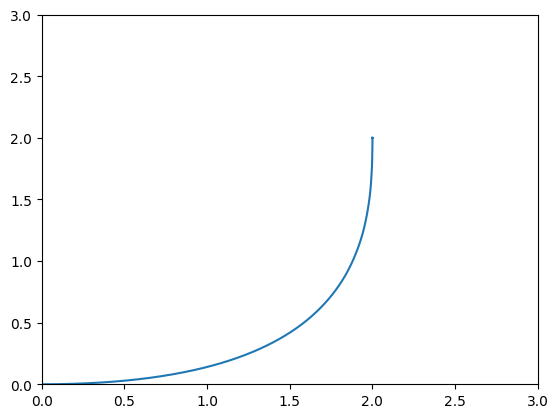

In [ ]:
import numpy as np 
import scipy.integrate as spi 
import matplotlib.pyplot as plt 

def step_function(x):
    return np.where(x <= 0, 0, 1)

w_dot = [0, 0]

def func(t, w):
    w_dot[0] = -0.5 * w[0] + step_function(t-5)
    w_dot[1] = -0.2 * (w[1] - w[0])
    return w_dot

N = 100
w0 = [0,0]
t_span = [0, N]
t_pts = np.linspace(0, N, 10000)

solution = spi.solve_ivp(func, t_span, w0, t_eval= t_pts, method='RK45')

fig, ax = plt.subplots()
ax.plot(solution.y[0,:], solution.y[1,:], '-')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.show()

## Question: Solve and Simulate a Simple RLC Circuit

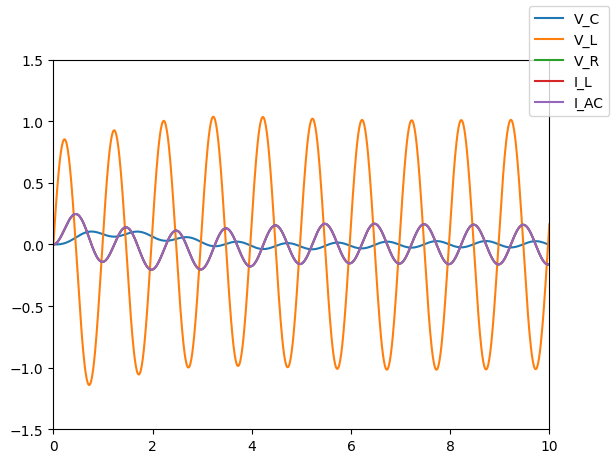

In [6]:
import numpy as np 
import scipy.integrate as spi 
import matplotlib.pyplot as plt 

R = 1
L = 1
C = 1
Amptitude = 1
Freq = 1

y_dot = [0,0,0,0,0]

def func(t, y, R, L, C):
    # Vac = Amptitude * np.sin(t)
    y_dot[0] = y[3] / C # V_C
    y_dot[3] = y[1] / L # I_L
    y_dot[2] = R * y_dot[3] # V_R
    y_dot[4] = y_dot[3] # I_AC
    y_dot[1] = 2 * np.pi * Freq * Amptitude * np.cos(2 * np.pi * Freq * t) - y_dot[0] - y_dot[2] # V_L
    # print(y_dot)
    return y_dot

N = 10
y0 = [0,0,0,0,0]
t_span = [0, N]
t_pts = np.linspace(0, N, 1000)

solution = spi.solve_ivp(func, t_span, y0, args=(R, L, C), t_eval= t_pts, method='RK45')

fig, ax = plt.subplots()
ax.plot(t_pts, solution.y[0,:], '-', label='V_C') 
ax.plot(t_pts, solution.y[1,:], '-', label='V_L')
ax.plot(t_pts, solution.y[2,:], '-', label='V_R')
ax.plot(t_pts, solution.y[3,:], '-', label='I_L')
ax.plot(t_pts, solution.y[4,:], '-', label='I_AC')

lines =[]
labels =[]
for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)
fig.legend(lines, labels, loc='upper right')

ax.set_xlim(0, N)
ax.set_ylim(-1.5 * Amptitude, 1.5 * Amptitude)
plt.show()
# fig.savefig("RLC_example.png")

## Question: System Identification Mini Project

In [ ]:
import numpy as np
import mujoco
import mujoco.minimize as minimize




## Example: Cellular Automata

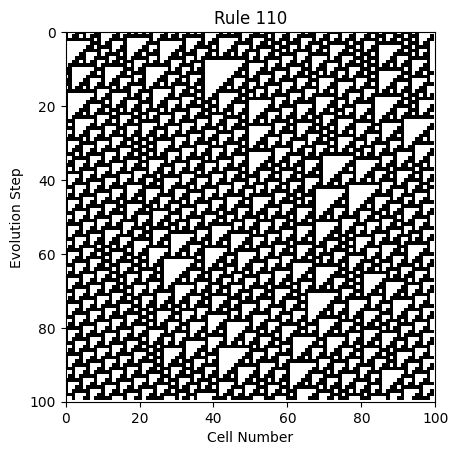

In [49]:
import numpy as np
import matplotlib.pyplot as plt 

u = np.array([[4], [2], [1]]) # vector to represent binary 3 bits

def step(x, rule_b):
    """Compute a single step of an elementary cellular    automaton."""
    # The columns contain the L, C, and R values
    # of all cells.
    y = np.vstack((np.roll(x, 1), x,
                   np.roll(x, -1))).astype(np.int8)  # shift array elements, then stack them vertically
    # We get the LCR pattern numbers between 0 and 7.
    z = np.sum(y * u, axis=0).astype(np.int8)
    # We get the patterns given by the rule.
    return rule_b[7 - z]

def generate(rule, initial_state, size, steps):
    """Simulate an elementary cellular automaton given    its rule (number between 0 and 255)."""
    # Compute the binary representation of the rule.
    rule_b = np.array(
        [int(_) for _ in np.binary_repr(rule, 8)],
        dtype=np.int8)
    x = np.zeros((steps, size), dtype=np.int8)
    # Random initial state.
    x[0, :] = initial_state    # Apply the step function iteratively.
    for i in range(steps - 1):
        x[i + 1, :] = step(x[i, :], rule_b)
    return x

rule = 110  # try also 110
cell_array_size = 100
nbr_evolve_steps = 100
initial_state = np.zeros(cell_array_size)
initial_state = np.random.rand(cell_array_size) < .5  # random initial state# initial_state[99]= 1  # just a single cell as starting state (comment above)
x = generate(rule, initial_state, cell_array_size, nbr_evolve_steps)
# We plot the particle's trajectory.
fig, ax = plt.subplots()
ax.imshow(x, interpolation='none', cmap=plt.cm.binary)
ax.set(xlabel='Cell Number', ylabel='Evolution Step', title="Rule "+str(rule))
ax.set_xlim(0, cell_array_size)
ax.set_ylim(nbr_evolve_steps, 0)
plt.show()
# fig.savefig("cellular_automata-"+str(rule)+".png")  # you can save the figure if you wish

## Question: FSM Mini Project

-  A Lift Controller as [shown here]("https://www.electronics-tutorial.net/finite-state-machines/FSM-Applications/Lift-Controller/").

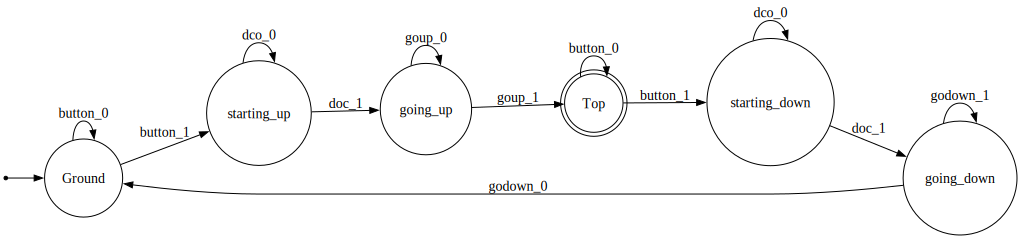

In [ ]:
from automata.fa.nfa import NFA

LiftCtrlNFA = NFA(
    states = {'Ground', 'starting_up', 
              'going_up', 'going_down', 
              'starting_down', 'Top'},
    input_symbols = {'button_0', 'button_1','dco_0','doc_1','go_up_0','go_up_1','go_down_0','go_down_1'},
    transitions = {
        'Ground' : {'button_0' : {'Ground'}, 'button_1' : {'starting_up'}},
        'starting_up' : {'dco_0' : {'starting_up'}, 'doc_1' : {'going_up'}},
        'going_up' : {'go_up_0' : {'going_up'}, 'go_up_1' : {'Top'}},
        'going_down' : {'go_down_1' : {'going_down'}, 'go_down_0' : {'Ground'}},
        'starting_down' : {'dco_0' : {'starting_down'}, 'doc_1' : {'going_down'}},
        'Top' : {'button_0' : {'Top'}, 'button_1' : {'starting_down'}}
    },
    initial_state = 'Ground',
    final_states = {'Top'}
)

LiftCtrlNFA.show_diagram()


In [ ]:
def read_user_input(my_automaton, input_sequence):
   if my_automaton.accepts_input(input_sequence):
      print("")
   else:
      print("")

read_user_input(LiftCtrlNFA,"0111101")